## 1) Introduction

Netflix is one of the most well-known media and video streaming services. They offer more than 10000 movies and TV episodes on their platform, and as of the middle of 2023, they had more than 230 million subscribers worldwide. Because of this, Netflix is a popular streaming service with a wide range of users.

However, if subscribers to Netflix begin binge-watching a particular genre of films or television shows, they are likely to look for more of the same to watch. How could customers sort through more than 10 million films to truly locate the ones they like? They won't likely do that because it takes a lot of time.
Thus, the significance of clustering.

By prioritizing the movies or series that fall under the same genre as the movies that users typically watch, Netflix is able to provide its users with satisfactory results.Customers will save a ton of time, and Netflix will make a ton of money.

In this unsupervised learning project, we are going to identify similar movies or series based on movie characteristics with the help of a suitable data set. This tabular dataset consists of listings of the movies and tv shows available on Netflix, along with details such as  cast, directors, ratings, release year, duration and so on.

The objective of this research is to categorize or group the Netflix shows into distinct clusters in which the shows are similar to one another and different to one another.
 
 We will thoroughly cover each of the following steps during this project:
 
 1- Clean, explore and visualize the dataset.
 
 2- Perform clustering algorithm techniques, after which we will be able to understand how different and similar shows are from one another
 
 3- Use these clusters to provide customers with tailored show recommendations based on their tastes.


Below is the link to access the dataset:

 [netflix titles dataset](https://www.kaggle.com/datasets/shivamb/netflix-shows/download?datasetVersionNumber=5)

## 2) Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, MiniBatchKMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn import metrics
import umap


import warnings
warnings.filterwarnings("ignore")

/home/angelo/.local/lib/python3.10/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/angelo/.local/lib/python3.10/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/angelo/.local/lib/python3.10/site-packages/umap/distances.py:1086: NumbaDeprecationWarning: Th

## 3) Exploratory Data Analysis

We will examine the data set in greater detail here. Through data cleaning, exploration, and visualization, we will produce a more reliable data set for our experiment. 

The variables are 

show_id : Unique ID for every Movie / Tv Show  \
type : Identifier - A Movie or TV Show   \
title : Title of the Movie / Tv Show  \
director : Director of the Movie \
cast : Actors involved in the movie / show \
country : Country where the movie / show was produced \
date_added : Date it was added on Netflix \
release_year : Actual Releaseyear of the movie / show \
rating : TV Rating of the movie / show \
duration : Total Duration - in minutes or number of seasons \
listed_in : Genre \
description: The Summary description 

In [2]:
netflix_df=pd.read_csv("/home/angelo/Desktop/THINKFUL DATA SCIENCE FLEX/Graded Assignment/CAPSTONE 3/netflix_titles.csv")

In [3]:
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
netflix_df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [5]:
netflix_df.shape

(8807, 12)

### Cleaning the data

#### Missing values

In [6]:
netflix_df.isna()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,False,False,False,False,True,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,False,False
3,False,False,False,True,True,True,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,False,False,False,False,False,False,False,False,False,False,False,False
8803,False,False,False,True,True,True,False,False,False,False,False,False
8804,False,False,False,False,False,False,False,False,False,False,False,False
8805,False,False,False,False,False,False,False,False,False,False,False,False


#### Percentage of missing values for each feature

In [8]:
netflix_df.isnull().sum()*100/len(netflix_df)

show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64

We identidy 6 variables with missing values: director, cast, country, data added, rating and duration.

Variables "director" presents more than 29 percent of missing values. For that reason, removing all the records with  no director is not the best option. The same for the other varibales. \
Also, the values are non numerical, so replacing the missing values with the mean or the median or interpolation does not make sense. \
Instead we will replace the missing values with the value that appear the most(mode) for each feature which makes more sense.

In [9]:
missing=["director", "cast", "country", "date_added","rating"]

In [10]:
for column in missing:
    netflix_df[column]=netflix_df[column].fillna(netflix_df[column].mode()[0])

Now let us look at the remaning missing values

In [11]:
netflix_df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        3
listed_in       0
description     0
dtype: int64

The last variable to deal with is "duration". Since the percentage of missing values is very small, we will just ignore the missing values and drop them.

In [12]:
netflix_df=netflix_df.dropna()

In [13]:
netflix_df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

Now there is no more missing values and we can proceed to the next steps.

In [13]:
#The new shape of the data is:
netflix_df.shape

(8804, 12)

#### Changing duration to integer.

The "duration" variable is evaluated in minutes for movies and number of saisons for Tv Shows.We'll change it to an integer so we can analyze it more thoroughly. \
We will assume that, one season of a serie is about 360 minutes. \
The integer that is going to represent duration will be the time in minutes.

In [42]:
data=netflix_df.copy()

In [43]:
# converting duration to integer
data['duration'] = data['duration'].apply(lambda x: int(x.split()[0]))

In [44]:
for i in list(data.duration.index):
    if data.duration[i]<20:
        data.duration[i]= data.duration[i]*360

In [45]:
data.duration

0        90
1       720
2       360
3       360
4       720
       ... 
8802    158
8803    720
8804     88
8805     88
8806    111
Name: duration, Length: 8804, dtype: int64

### Data exploration and visualization

Almost all the variables are non numerical

#### Univariate exploration

##### type (movie/tv show)

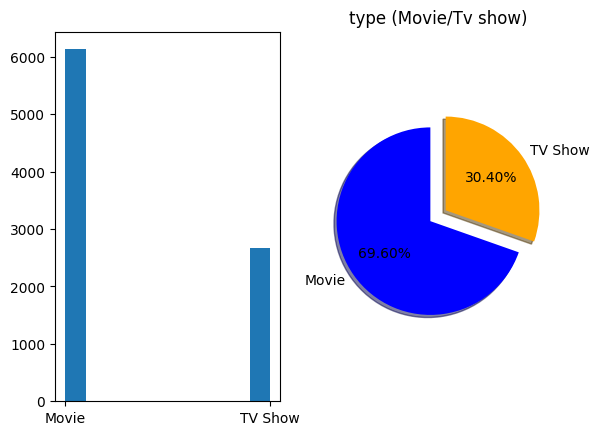

In [46]:
plt.subplot(1,2,1)
plt.hist(netflix_df.type)
plt.subplot(1,2,2)
labels= list(netflix_df.type.value_counts().index)

#colors=['blue', 'yellow', 'green', 'orange']
colors=['blue','orange']
sizes= list(netflix_df.type.value_counts().values)

plt.pie(sizes,labels=labels, colors=colors, startangle=90, shadow=True,explode=(0.1, 0.1), autopct='%1.2f%%')

plt.title('type (Movie/Tv show)')

plt.axis('equal')
plt.savefig('image1.png')
plt.show()

there are over 6000 (69.6%) movies in the data set and just around 2700 (30.4%) TV shows.

##### country

In [47]:
netflix_df.country.value_counts()

United States                             3646
India                                      972
United Kingdom                             419
Japan                                      245
South Korea                                199
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: country, Length: 748, dtype: int64

Most movies/TV shows are produced in the USA, followed by India and the United Kingdom.

###### Top 5 countries with most TV/shows or movies

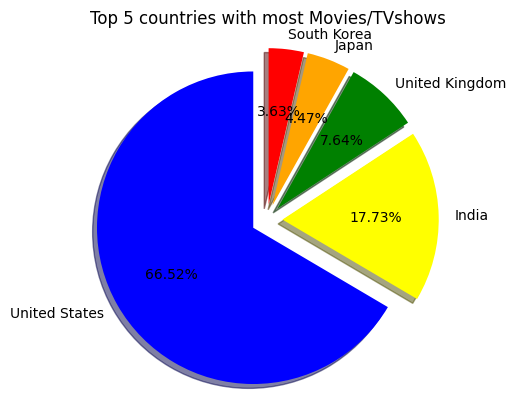

In [48]:
#plt.figure(figsize=(15,7))
labels= list(netflix_df.country.value_counts()[:5].index)

colors=['blue', 'yellow', 'green', 'orange','red']

sizes= list(netflix_df.country.value_counts()[:5].values)

plt.pie(sizes,labels=labels, colors=colors, startangle=90, shadow=True,explode=(0.1, 0.1,0.1,0.1,0.1), autopct='%1.2f%%')

plt.title('Top 5 countries with most Movies/TVshows')

plt.axis('equal')
plt.savefig('image2.png')
plt.show()

##### director

In [49]:
df=pd.read_csv("/home/angelo/Desktop/THINKFUL DATA SCIENCE FLEX/Graded Assignment/CAPSTONE 3/netflix_titles.csv")
df.director.value_counts()

Rajiv Chilaka                     19
Raúl Campos, Jan Suter            18
Marcus Raboy                      16
Suhas Kadav                       16
Jay Karas                         14
                                  ..
Raymie Muzquiz, Stu Livingston     1
Joe Menendez                       1
Eric Bross                         1
Will Eisenberg                     1
Mozez Singh                        1
Name: director, Length: 4528, dtype: int64

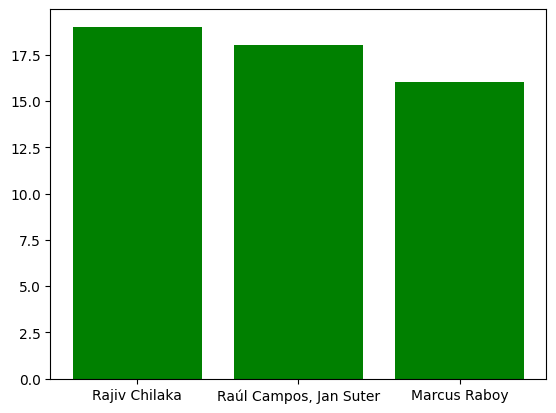

In [50]:
#plt.figure(figsize=(25,17))
plt.bar(list(df.director.value_counts()[:3].index), list(df.director.value_counts()[:3].values),color='green' )
plt.savefig('image3.png')
plt.show()

The top 3 directors with most Movies/TV shows are: Rajiv Chilaka, Raul Campos and Jan Sutera and Marcus Raboy.

##### released year

(array([1.000e+00, 8.000e+00, 7.000e+00, 2.100e+01, 2.700e+01, 9.900e+01,
        1.500e+02, 2.940e+02, 1.106e+03, 7.091e+03]),
 array([1925. , 1934.6, 1944.2, 1953.8, 1963.4, 1973. , 1982.6, 1992.2,
        2001.8, 2011.4, 2021. ]),
 <BarContainer object of 10 artists>)

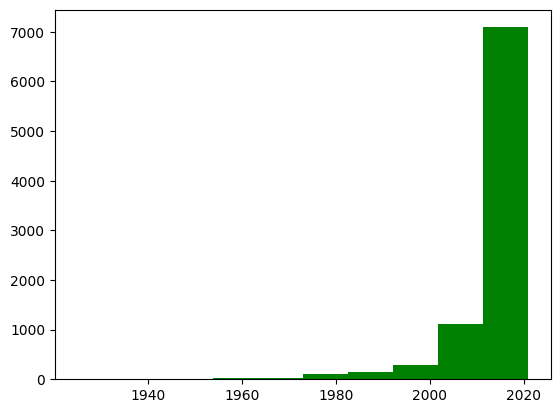

In [51]:
plt.hist(netflix_df.release_year,color='green')

Most movies/TV shows are released in between 2015 and 2020. It means that, Netflix has much more recent movies/TV shows than old movies/TV shows.

##### category of movies/tvshows

In [52]:
netflix_df.listed_in.value_counts()

Dramas, International Movies                          362
Documentaries                                         359
Stand-Up Comedy                                       334
Comedies, Dramas, International Movies                274
Dramas, Independent Movies, International Movies      252
                                                     ... 
Kids' TV, TV Action & Adventure, TV Dramas              1
TV Comedies, TV Dramas, TV Horror                       1
Children & Family Movies, Comedies, LGBTQ Movies        1
Kids' TV, Spanish-Language TV Shows, Teen TV Shows      1
Cult Movies, Dramas, Thrillers                          1
Name: listed_in, Length: 514, dtype: int64

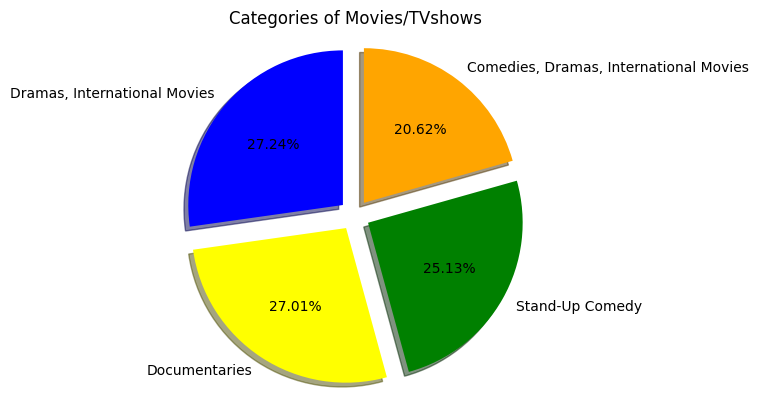

In [53]:
labels= list(netflix_df.listed_in.value_counts()[:4].index)

colors=['blue', 'yellow', 'green', 'orange']

sizes= list(netflix_df.listed_in.value_counts()[:4].values)

plt.pie(sizes,labels=labels, colors=colors, startangle=90, shadow=True,explode=(0.1, 0.1,0.1,0.1), autopct='%1.2f%%')

plt.title('Categories of Movies/TVshows')

plt.axis('equal')
plt.savefig('image4.png')
plt.show()

Most movies/TV shows are in the drama category and international movies, closely followed by documentaries and stand-up comedy.

##### movie rating

In [54]:
netflix_df.rating.value_counts()

TV-MA       3211
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: rating, dtype: int64

Most movies/TV shows are rated TV-MA and TV-14.

This does make sense because TV-MA is for (Mature Audience only) and most netflix shows and movies display mature contents such as sex scenes.. and also many programs are unsuitable for ages under 14.

##### duration

In [55]:
data[data.type=='Movie'].duration.value_counts()

90      152
94      146
93      146
97      146
91      144
       ... 
212       1
2880      1
186       1
193       1
191       1
Name: duration, Length: 205, dtype: int64

The majority of most movies last for about 90 minutes, with most movies not taking longer than 100 minutes overall.

In [56]:
data[data.type=='TV Show'].duration.value_counts()

360     1793
720      425
1080     199
1440      95
1800      65
2160      33
2520      23
2880      17
3240       9
3600       7
4680       3
5400       2
4320       2
3960       2
6120       1
Name: duration, dtype: int64

The majority of TV shows are 360 minutes long, which represents only one season according to our assumption.

#### Multivariate exploration

<AxesSubplot:xlabel='count', ylabel='rating'>

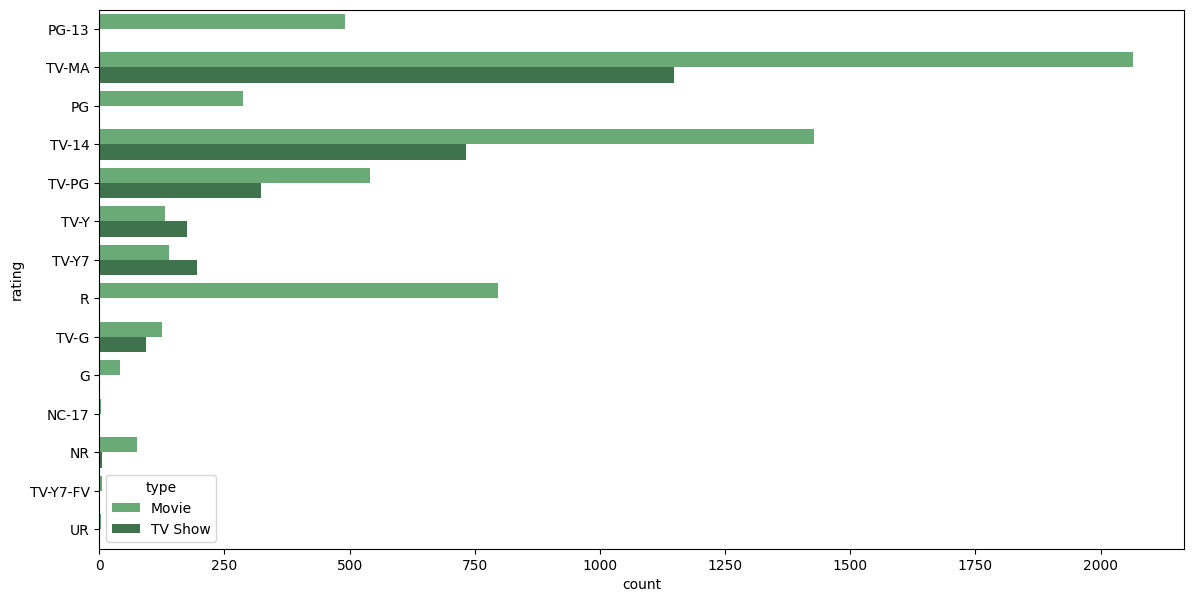

In [57]:
plt.figure(figsize=(14,7))

sns.countplot(y="rating", hue="type", data=netflix_df, palette="Greens_d")

### Feature engineering

All the variables are non numerical and we do need to change the ones we plan on using to numerical before going further.

#### Importance of each variable

Preprocessing steps:
    
show_id :  not important \
type : important (will be changed to 1 if it is a movie and 0 if it is a TV/show) \
title : not important \
director : important but might be biased since we changed 29 percent of missing values in the director column with the mode. So, we decide not to use it. \
cast : not important \
country : important (wll be changed to 3 for United states, 2 for india, 1 for United kingdon and 0 for another country) 
date_added : not important \
release_year : not important \
rating : important ( will be changed to 2 for TVMA, 1 for TV14, 0 for another rating) \
duration : important (will be replaced with 3 dor drama, 2 for documentary, 1 for comedy and 0 for another)  \
listed_in : important \
description: not important




For our clustering algorithm, we will focus the the following varibales: \
"type , country, rating, duration, listed_in" \
The strategy to transform these variables to numerical variables are just on top.

##### changing "type" to numerical

In [58]:
data.type = np.where(data.type  == 'Movie', 1, 0)

##### changing "country" to numerical

In [59]:
for i in list(data.duration.index):
    if data.country[i]=="United States":
        data.country[i]= 3
    elif data.country[i]=="India":
        data.country[i]=2
    elif data.country[i]=="United Kingdom":
        data.country[i]=1
    else:
        data.country[i]=0
        

##### changing "rating" to numerical

In [60]:
for i in list(data.duration.index):
    if data.rating[i]=="TV-MA":
        data.rating[i]= 2
    elif data.rating[i]=="TV-14":
        data.rating[i]=1
    else:
        data.rating[i]=0

##### changing "listed_in" to numerical

In [61]:
for i in list(data.duration.index):
    if data.listed_in[i]=="Dramas, International Movies":
        data.listed_in[i]= 3
    elif data.listed_in[i]=="Documentaries":
        data.listed_in[i]=2
    elif data.listed_in[i]=="Stand-Up Comedy":
        data.listed_in[i]=1
    else:
        data.listed_in[i]=0

## 4) Model Definition: Clustering

### Training data definition and standardization

The data we will be using for our model comes right from the prepocessing. 

In [63]:
X=data[["type","country","rating","duration","listed_in"]]

In [64]:
#X

In [65]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

### First visualization of the data with PCA and UMAP algorithm to see if we can early identify some clusters

#### PCA

In [197]:
pca = PCA(n_components=2)

# We get the components by 
# calling fit_transform method with our data
pca_components = pca.fit_transform(X_std)

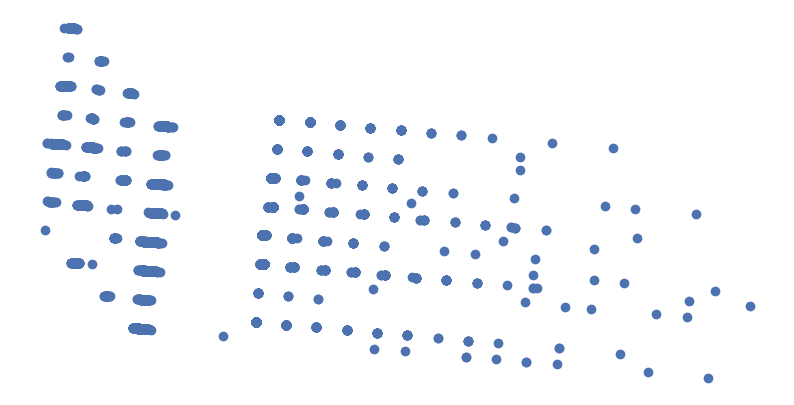

In [198]:
plt.figure(figsize=(10,5))
plt.scatter(pca_components[:, 0], pca_components[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

#### UMAP

In [199]:
umap_results = umap.UMAP(n_neighbors=5,
                      min_dist=0.3,
                      metric='correlation').fit_transform(X_std)

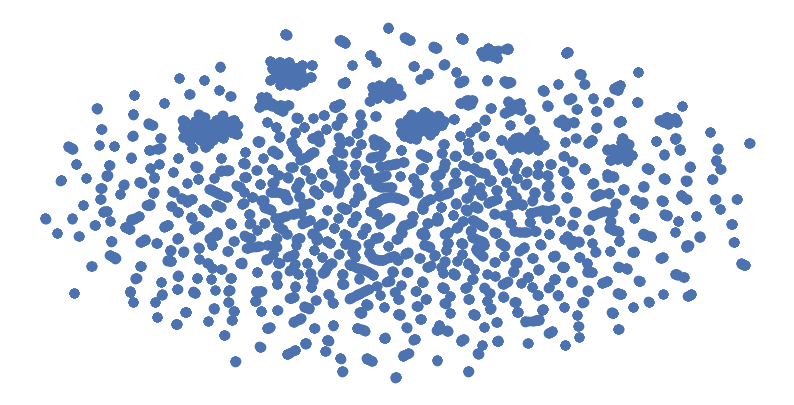

In [200]:
plt.figure(figsize=(10,5))
plt.scatter(umap_results[:, 0], umap_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

We cannot identify any clusters or make an educated judgment as to the number of clusters a priori. 

### Clustering algorithms

We continue analysis by implementing the following clustering models:\
1- K-means  \
2-Hierarchical clustering \
3- Gaussian Mixture Model \
4- DBSCAM \
The model with the most logical results will be chosen. 

#### K means implementation

In [66]:
for i in range(2,21,2):
    k_means = KMeans(n_clusters=i, random_state=123)
    pred=k_means.fit_predict(X_std)
    print("Silhouette score for {} cluster k-means: {}".format(i,
    metrics.silhouette_score(X_std, pred, metric='euclidean')))

Silhouette score for 2 cluster k-means: 0.2674400320615718
Silhouette score for 4 cluster k-means: 0.3920182640642704
Silhouette score for 6 cluster k-means: 0.4578254117154881
Silhouette score for 8 cluster k-means: 0.5580208486922946
Silhouette score for 10 cluster k-means: 0.5765451725676597
Silhouette score for 12 cluster k-means: 0.6001153413603713
Silhouette score for 14 cluster k-means: 0.6638317835862839
Silhouette score for 16 cluster k-means: 0.6848014952031708
Silhouette score for 18 cluster k-means: 0.70568620239553
Silhouette score for 20 cluster k-means: 0.7112112226845627


Aftee trying different number of clusters for K means, Kmeans with 20 clusters performs quite well with a silhouette score of 0.71.

#### Hierarchical clustering implementation

In [202]:
for i in range(2,21,2):
    linkage_methods = ["ward", "average", "complete"]

    # Defining the agglomerative clustering
    agg_cluster = AgglomerativeClustering(linkage="average", 
                                      affinity='cosine',
                                      n_clusters=i)
    # Fit model
    clusters = agg_cluster.fit_predict(X_std)

    print("Silhouette score of linkage method average with {} clusters: {}".format(i,
    metrics.silhouette_score(X_std, clusters, metric='euclidean')))
    print("------------------------------------------------")
    # Defining the agglomerative clustering
    agg_cluster = AgglomerativeClustering(linkage="complete", 
                                      affinity='cosine',
                                      n_clusters=i)
    # Fit model
    clusters = agg_cluster.fit_predict(X_std)

    print("Silhouette score of linkage method complete with {} clusters: {}".format(i,
        metrics.silhouette_score(X_std, clusters, metric='euclidean')))
    print("------------------------------------------------")

    # Defining the agglomerative clustering
    agg_cluster = AgglomerativeClustering(linkage="ward", 
                                      affinity='euclidean',
                                      n_clusters=i)

    # Fit model
    clusters = agg_cluster.fit_predict(X_std)

    print("Silhouette score of linkage method ward with {} clusters: {}".format(i,
        metrics.silhouette_score(X_std, clusters, metric='euclidean')))

Silhouette score of linkage method average with 2 clusters: 0.35414734286488636
------------------------------------------------
Silhouette score of linkage method complete with 2 clusters: 0.35420414982747295
------------------------------------------------
Silhouette score of linkage method ward with 2 clusters: 0.35414734286488636
Silhouette score of linkage method average with 4 clusters: 0.38777778278416736
------------------------------------------------
Silhouette score of linkage method complete with 4 clusters: 0.3847420435466798
------------------------------------------------
Silhouette score of linkage method ward with 4 clusters: 0.337995559446826
Silhouette score of linkage method average with 6 clusters: 0.4624054776078728
------------------------------------------------
Silhouette score of linkage method complete with 6 clusters: 0.4651182012826848
------------------------------------------------
Silhouette score of linkage method ward with 6 clusters: 0.425924144827897

Yet again, the best silhouette is accomplished with 20 clusters. With a linkage method average, the silhouette score is 0.698.

#### Gaussian Mixture Model implementation

In [203]:
# Defining the agglomerative clustering
for i in range(2,21,2):
    gmm_cluster = GaussianMixture(n_components=i, random_state=123, covariance_type="full")

# Fit model
    clusters = gmm_cluster.fit_predict(X_std)

    print("Silhouette score with covariance_type=full with {} clusters: {}".format(i,
    metrics.silhouette_score(X_std, clusters, metric='euclidean')))
    print("------------------------------------------------------")

# Defining the agglomerative clustering
    gmm_cluster = GaussianMixture(n_components=i, random_state=123, covariance_type="tied")

# Fit model
    clusters = gmm_cluster.fit_predict(X_std)


    print("Silhouette score with covariance_type=tied with {} clusters: {}".format(i,
    metrics.silhouette_score(X_std, clusters, metric='euclidean')))
    print("------------------------------------------------------")

# Defining the agglomerative clustering
    gmm_cluster = GaussianMixture(n_components=i, random_state=123, covariance_type="diag")

# Fit model
    clusters = gmm_cluster.fit_predict(X_std)


    print("Silhouette score with covariance_type=diag with {} clusters: {}".format(i,
    metrics.silhouette_score(X_std, clusters, metric='euclidean')))
    print("------------------------------------------------------")


# Defining the agglomerative clustering
    gmm_cluster = GaussianMixture(n_components=i, random_state=123, covariance_type="spherical")

    # Fit model
    clusters = gmm_cluster.fit_predict(X_std)

    print("Silhouette score with covariance_type=spherical with {} clusters: {}".format(i,
    metrics.silhouette_score(X_std, clusters, metric='euclidean')))
    print("------------------------------------------------------")


Silhouette score with covariance_type=full with 2 clusters: 0.18897972174706448
------------------------------------------------------
Silhouette score with covariance_type=tied with 2 clusters: 0.2674400320615718
------------------------------------------------------
Silhouette score with covariance_type=diag with 2 clusters: 0.17182488939297977
------------------------------------------------------
Silhouette score with covariance_type=spherical with 2 clusters: 0.09935849295950766
------------------------------------------------------
Silhouette score with covariance_type=full with 4 clusters: 0.4003937258678825
------------------------------------------------------
Silhouette score with covariance_type=tied with 4 clusters: 0.34943605897768865
------------------------------------------------------
Silhouette score with covariance_type=diag with 4 clusters: 0.4004936487476392
------------------------------------------------------
Silhouette score with covariance_type=spherical with 

The best silhouette score of 0.69 is accomplished with a tied covariance and 20 clusters.

#### DSBSCAN implementation

In [204]:
for i in range (5,75,10):
    for j in [0.3,0.5,0.8,1,1.2,1.5,1.8,2]:
        dbscan_cluster = DBSCAN(eps=j, min_samples=i)

# Fit model
        clusters = dbscan_cluster.fit_predict(X_std)
        print("The silhouette score of the DBSCAN solution with eps= {} and min samples = {}: {}"
      .format(j,i,metrics.silhouette_score(X_std, clusters, metric='euclidean')))

The silhouette score of the DBSCAN solution with eps= 0.3 and min samples = 5: 0.9305982086922688
The silhouette score of the DBSCAN solution with eps= 0.5 and min samples = 5: 0.9308727716110439
The silhouette score of the DBSCAN solution with eps= 0.8 and min samples = 5: 0.34740640319711524
The silhouette score of the DBSCAN solution with eps= 1 and min samples = 5: 0.34740640319711524
The silhouette score of the DBSCAN solution with eps= 1.2 and min samples = 5: 0.2964277511321163
The silhouette score of the DBSCAN solution with eps= 1.5 and min samples = 5: 0.3485457811031088
The silhouette score of the DBSCAN solution with eps= 1.8 and min samples = 5: 0.349453445886687
The silhouette score of the DBSCAN solution with eps= 2 and min samples = 5: 0.34957166430968606
The silhouette score of the DBSCAN solution with eps= 0.3 and min samples = 15: 0.8896445794992909
The silhouette score of the DBSCAN solution with eps= 0.5 and min samples = 15: 0.8899145961819832
The silhouette score

We got an almost perfect silhouette score with 0.931 with eps= 0.5 and min samples = 5. \
Before choosing this model, we will investigate, how many clusters does this model produce because DBSCAN does not choose the number of clusters a priori.

##### number of clusters for DBSCAN

In [207]:
dbscan_cluster = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan_cluster.fit_predict(X_std)
print("the number of clusters is: {}".format(len(np.unique(clusters))))

the number of clusters is: 83


83 clusters is way too much to proceed. W will choose 20 clusters and choose the algorithm with the highest silhouette score.
We have:\
1- kmean score: 0.71 \
2- linkage average score: 0.698 \
3- GMM with covariance score: 0.69 \
Conclusion: Kmeans with 20 clusters is  optimal choice.

### Adding prediction clusters

In [208]:
k_means = KMeans(n_clusters=20, random_state=123)
pred=k_means.fit_predict(X_std)

In [209]:
data["clusters"]=pred

In [210]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,clusters
0,s1,1,Dick Johnson Is Dead,Kirsten Johnson,David Attenborough,3,"September 25, 2021",2020,0,90,2,"As her father nears the end of his life, filmm...",10
1,s2,0,Blood & Water,Rajiv Chilaka,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",0,"September 24, 2021",2021,2,720,0,"After crossing paths at a party, a Cape Town t...",2
2,s3,0,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",3,"September 24, 2021",2021,2,360,0,To protect his family from a powerful drug lor...,5
3,s4,0,Jailbirds New Orleans,Rajiv Chilaka,David Attenborough,3,"September 24, 2021",2021,2,360,0,"Feuds, flirtations and toilet talk go down amo...",5
4,s5,0,Kota Factory,Rajiv Chilaka,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",2,"September 24, 2021",2021,2,720,0,In a city of coaching centers known to train I...,5


### Visualization of the 20 clusters with UMAP algorithm

In [67]:
umap_results = umap.UMAP(n_neighbors=5,
                      min_dist=0.3,
                      metric='correlation').fit_transform(X_std)

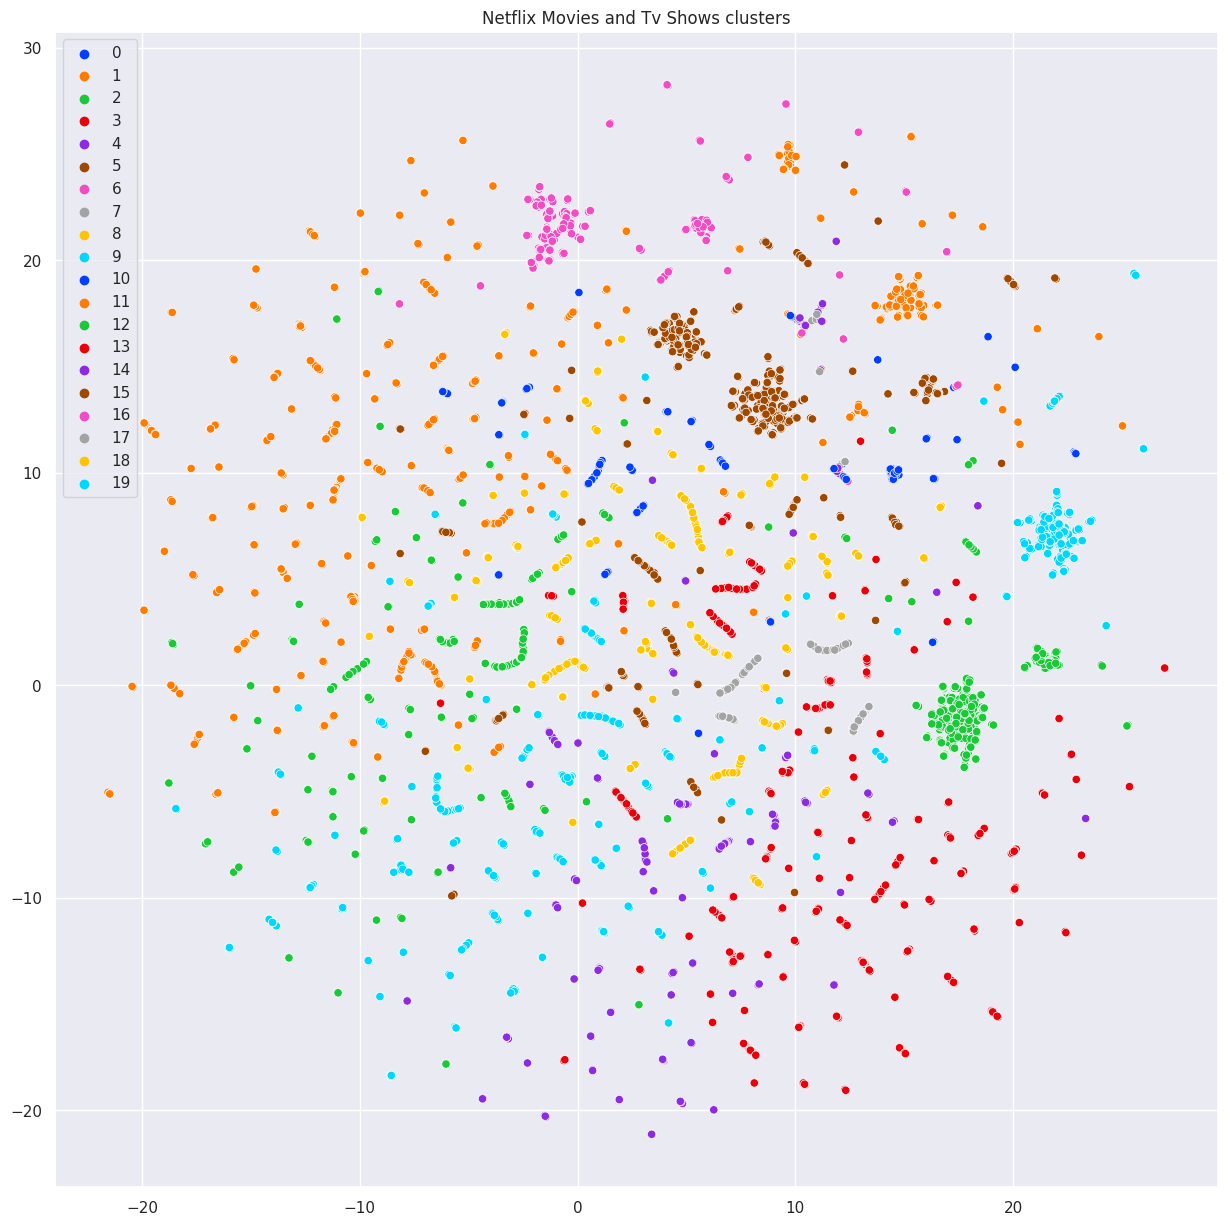

In [71]:
sns.set(rc={'figure.figsize':(15,15)})

# colors
palette = sns.color_palette("bright", len(set(pred)))

# plot
sns.scatterplot(x=umap_results[:, 0],y=umap_results[:, 1], hue=pred, legend='full', palette=palette)
plt.title("Netflix Movies and Tv Shows clusters")
plt.savefig('output2.png')
plt.show()


We can identify many clusters and this is a pretty satisfactory result.

## 5) Conclusion

Following a thorough examination, we arrive at the results listed below: 
 #### Our best model produced a silhouette score of 0.71 with  20 clusters, which that the model is close to be perfect than random.
 
#### Netflix can suggest (8804/20), or almost 440 similar TV shows and movies, for each movie or television program. This is the insight we get from the analysis. 


#### The ability to suggest films to clients based on what they typically view is a big perk that enhances the approach the Netflix platform uses to consistently satisfy its users.